In [72]:
#importing relevent libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#reading the csv data
df = pd.read_excel("Data-NB.xlsx")
df.head()

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-
3,2.75,19,34.0,Male,Low,C-
4,7.25,24,30.0,Male,High,C-


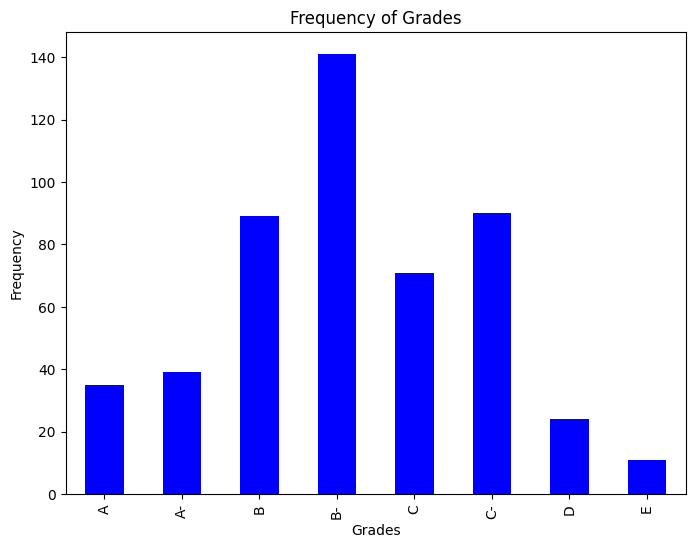

In [74]:
#plotting freuency of grades
plt.hist(df['Grade'])
plt.show()

In [75]:
#encoding Grade column
label="Grade"
classes= df[label].unique().tolist()
print(f"Label classes: {classes}")
df[label]= df[label].map(classes.index)

Label classes: ['A', 'B-', 'C-', 'D', 'B', 'A-', 'C', 'E']


In [76]:
#correcting Gender column
df['Gender'] = df['Gender'].replace({'Male ': 'Male', 'Mle': 'Male'})
df['Gender'] = df['Gender'].replace({'Female ': 'Female'})

In [77]:
#encoding Gender column
label="Gender"
classes= df[label].unique().tolist()
print(f"Label classes: {classes}")
df[label]= df[label].map(classes.index)

Label classes: ['Male', 'Female']


In [78]:
#encoding Attendance column
label="Attendance"
classes= df[label].unique().tolist()
print(f"Label classes: {classes}")
df[label]= df[label].map(classes.index)
df

Label classes: ['High', 'Low', 'Moderate']


,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,0,0,0
1,15.00,24,67.0,1,0,0
2,5.25,24,45.0,0,0,1
3,2.75,19,34.0,0,1,2
4,7.25,24,30.0,0,0,2
...,...,...,...,...,...,...
495,10.50,24,48.0,0,1,1
496,11.00,24,31.0,1,2,6
497,11.75,24,47.0,0,0,1
498,0.00,20,0.0,1,1,7


In [79]:
#defining dependent and independent variables
X = df.drop("Grade", axis=1)
y = df["Grade"]

In [80]:
#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [81]:
#training the model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 100 points : 27


In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.73


In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 5  0  0  0  0  1  0]
 [ 0 21  0  0  5  0  1]
 [ 0  0 14  0  0  0  3]
 [ 0  0  1  3  0  0  0]
 [ 0  5  0  0 15  0  0]
 [ 1  0  0  0  1  6  0]
 [ 0  7  1  1  0  0  9]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.64      0.78      0.70        27
           2       0.88      0.82      0.85        17
           3       0.75      0.75      0.75         4
           4       0.71      0.75      0.73        20
           5       0.86      0.75      0.80         8
           6       0.69      0.50      0.58        18

    accuracy                           0.73       100
   macro avg       0.77      0.74      0.75       100
weighted avg       0.74      0.73      0.73       100



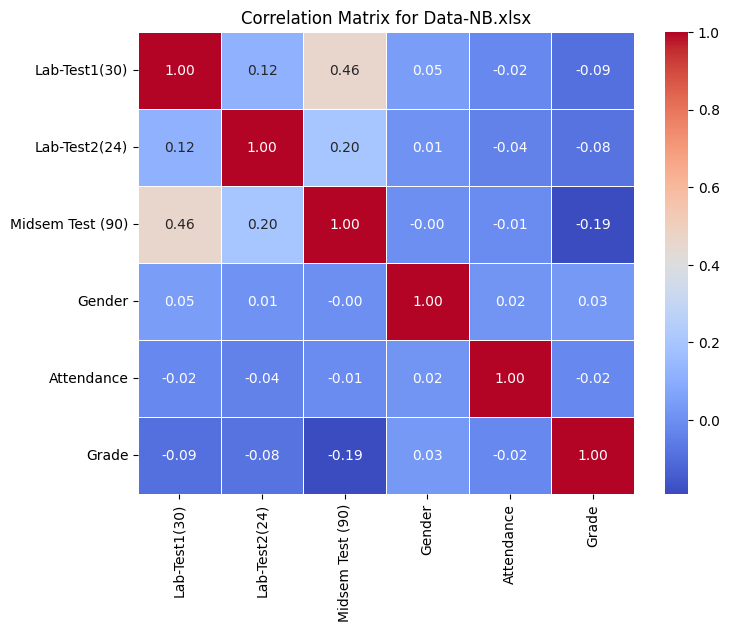

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Data-NB.xlsx')
plt.show()

The features seem to be mostly unrealted to each other as per the correlation matrix. This is in tandem with the Naive bayes assumption. If there are high correlations between features, it may violate the independence assumption of Naive Bayes, potentially affecting its performance. Naive Bayes model can have high bias but low variance, which can lead to underfitting while Random Forest and Gradient Boosted Trees can have lower bias and higher variance, causing overfitting.

In [87]:
iris_df = pd.read_csv('iris.csv')

In [88]:
iris_df.columns= ["Sepal length", "Sepal width", "Petal length", "Petal width", "Species"]

In [89]:
iris_df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [90]:
label="Species"
classes= iris_df[label].unique().tolist()
print(f"Label classes: {classes}")
iris_df[label]= iris_df[label].map(classes.index)

Label classes: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [91]:
X = iris_df.drop("Species", axis=1)
y = iris_df["Species"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [93]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 3


In [94]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9


In [95]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0  6  2]
 [ 0  1  9]]


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.75      0.80         8
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.89      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30



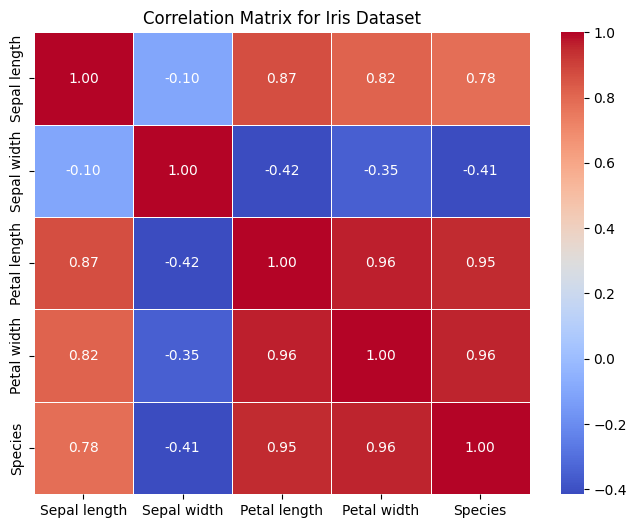

In [97]:
# Visualizing correlation matrix for Iris dataset
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Iris Dataset')
plt.show()

We observe higher correaltion between the features of the iris dataset. This violates the Naive Bayes assumption as the features are not truling independent of each other.

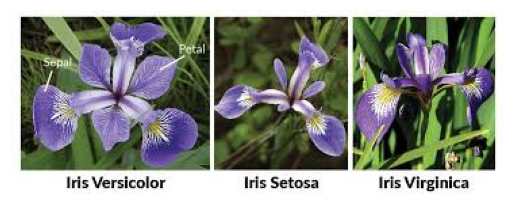

In [98]:
from PIL import Image
image_path= "iris.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

**Comparison with Random Forest and Gradient Boosted Trees**


Accuracy of Gaussian Naive Bayes model: 73%

Accuracy of Random Forest model: 86.4%

Accuracy of Gradient Boosted Trees model: 87%

Reasons for difference in performance:

1. Naive Bayes relies on the assumption of **feature independence**. If the features aren't fully independent, Naive Bayes performs poorly compared to algorithms that don't make this assumption, such as Random Forest and Gradient Boosted Trees.

2. Naive Bayes is a **less complex algorithm** compared to Random Forest and Gradient Boosted Trees. Complex datasets with non-linear relationships may not be well captured by Naive Bayes, leading to comparatively lower accuracy.

3. Random Forest and Gradient Boosted Trees are capable of automatically learning **feature importance**, which allows them to focus more on relevant features and ignore irrelevant ones. Naive Bayes treats all features equally, which may lead to lower accuracy if irrelevant features are present in the dataset.

4. Naive Bayes assumes that features are normally distributed, which makes it sensitive to outliers. If the dataset contains outliers, Naive Bayes may perform poorly. On the other hand, Random Forest and Gradient Boosted Trees are more robust to outliers.

5. If the dataset is imbalanced Naive Bayes may struggle to accurately classify the minority class. Random Forest and Gradient Boosted Trees can handle class imbalance better due to their ensemble nature and the ability to adjust class weights.

6. Random Forest and Gradient Boosted Trees have more **hyperparameters** to tune compared to Naive Bayes. If the hyperparameters are not tuned properly, Naive Bayes may perform worse compared to Random Forest and Gradient Boosted Trees with optimized hyperparameters.

7. Naive bayes does quite well with low amounts of data. Decision trees work better with lots of data compared to Naive Bayes.